# Our group are interested in Fastfood restuarants, we want to give some suggestions to owners of Fastfood restuarants in US based on Yelp review

In [58]:
import pandas as pd
import ast
import json
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
df_b = pd.read_json('yelp_dataset_2022/business.json', lines=True)

In [3]:
df_b

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


## Only keep the businesses that are still open

In [4]:
df_b = df_b[df_b['is_open']==1] 

## Only keep states in US

In [5]:
df_b["state"].value_counts()
us_states = ["AL", "KY", "OH", "AK", "LA", "OK", "AZ", "ME", "OR", "AR", "MD", "PA", "AS",
             "MA", "PR", "CA", "MI", "RI", "CO", "MN", "SC", "CT", "MS", "SD", "DE", "MO",
             "TN", "DC", "MT", "TX", "FL", "NE", "TT", "GA", "NV", "UT", "GU", "NH", "VT",
             "HI", "NJ", "VA","ID", "NM", "VI", "IL", "NY", "WA", "IN", "NC", "WV", "IA", 
             "ND", "WI", "KS", "MP", "WY"]
df_b = df_b[df_b['state'].isin(us_states)]
df_b["state"].value_counts() 

PA    26289
FL    21540
TN     9600
IN     8946
MO     8363
AZ     8108
LA     7676
NJ     7031
NV     6277
CA     4065
ID     3783
DE     1894
IL     1765
TX        4
WA        2
MA        2
HI        1
UT        1
CO        1
MI        1
SD        1
VT        1
Name: state, dtype: int64

## Exact rows containig "Fast Food"

In [6]:
business_list = list(df_b["categories"])

In [7]:
# show categories
business_set = []
for i in business_list:
    if i:
        business_set.extend(i.split(", "))
pd.Series(business_set).value_counts()[:50] 

Restaurants                  33252
Food                         19498
Shopping                     19362
Home Services                13164
Beauty & Spas                11838
Health & Medical             10810
Local Services                9935
Automotive                    9624
Nightlife                     8053
Event Planning & Services     7989
Bars                          7242
Active Life                   6283
Sandwiches                    5894
American (Traditional)        5393
Fast Food                     5241
Hotels & Travel               5019
Home & Garden                 4877
Auto Repair                   4876
Pizza                         4847
Coffee & Tea                  4688
Breakfast & Brunch            4245
Arts & Entertainment          4209
Fashion                       4182
Burgers                       4091
Hair Salons                   4037
Nail Salons                   3911
American (New)                3566
Doctors                       3517
Mexican             

In [8]:
fastfood = df_b[df_b.categories.str.contains('Fast Food',case=True,na=False)]
fastfood

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
97,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,5191 Meadowood Mall Cir,Reno,NV,89502,39.476518,-119.784037,4.5,5,1,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Dogs...","Sporting Goods, Sports Wear, Fashion, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
122,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,14,1,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Fast Food, Restaurants","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
153,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,10160 Ulmerton Rd,Largo,FL,33771,27.894167,-82.779866,3.0,19,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Tru...","Mexican, Fast Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:45-22:0',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150183,_rM0QpGDdFk3Vux2kltQsQ,Wendy's,8009 West Florissant Ave,St.Louis,MO,63136,38.727495,-90.276069,2.5,5,1,"{'RestaurantsReservations': 'False', 'Business...","Burgers, Restaurants, Fast Food, Sandwiches","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
150193,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,20 State Farm Dr,Glen Mills,PA,19342,39.883115,-75.542323,3.0,52,1,"{'BusinessParking': '{'garage': False, 'street...","Caterers, Fast Food, Event Planning & Services...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',..."
150205,Agh0Z_PACmbdEpLyjvuwZg,Chick-fil-A,6240 E Whitestown Pkwy,Whitestown,IN,46075,39.949502,-86.349949,2.5,32,1,"{'BusinessParking': '{'garage': False, 'street...","Chicken Shop, Caterers, Fast Food, Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '6:30-21:0', ..."
150231,C96ynw3G1KrqBOdafxbTKw,Subway,4882 Sun City Center Blvd,Sun City Center,FL,33573,27.714605,-82.335851,4.0,5,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Restaurants, Fast Food, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."


### remove rows that have no attributes(attributes == "NA")

In [9]:
fastfood = fastfood.loc[~(pd.isna(fastfood["attributes"])), :] 
fastfood = fastfood.loc[~(pd.isna(fastfood["stars"])), :]

In [10]:
fastfood

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
97,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,5191 Meadowood Mall Cir,Reno,NV,89502,39.476518,-119.784037,4.5,5,1,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Dogs...","Sporting Goods, Sports Wear, Fashion, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
122,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,14,1,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Fast Food, Restaurants","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
153,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,10160 Ulmerton Rd,Largo,FL,33771,27.894167,-82.779866,3.0,19,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Tru...","Mexican, Fast Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:45-22:0',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150183,_rM0QpGDdFk3Vux2kltQsQ,Wendy's,8009 West Florissant Ave,St.Louis,MO,63136,38.727495,-90.276069,2.5,5,1,"{'RestaurantsReservations': 'False', 'Business...","Burgers, Restaurants, Fast Food, Sandwiches","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
150193,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,20 State Farm Dr,Glen Mills,PA,19342,39.883115,-75.542323,3.0,52,1,"{'BusinessParking': '{'garage': False, 'street...","Caterers, Fast Food, Event Planning & Services...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',..."
150205,Agh0Z_PACmbdEpLyjvuwZg,Chick-fil-A,6240 E Whitestown Pkwy,Whitestown,IN,46075,39.949502,-86.349949,2.5,32,1,"{'BusinessParking': '{'garage': False, 'street...","Chicken Shop, Caterers, Fast Food, Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '6:30-21:0', ..."
150231,C96ynw3G1KrqBOdafxbTKw,Subway,4882 Sun City Center Blvd,Sun City Center,FL,33573,27.714605,-82.335851,4.0,5,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Restaurants, Fast Food, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."


# Attribute Analysis

In [11]:
fastfood[["attributes"]].iloc[0,0]

{'BusinessParking': 'None',
 'BusinessAcceptsCreditCards': 'True',
 'RestaurantsAttire': "u'casual'",
 'OutdoorSeating': 'True',
 'RestaurantsReservations': 'False',
 'Caters': 'False',
 'RestaurantsTakeOut': 'True',
 'Alcohol': "u'none'",
 'Ambience': 'None',
 'GoodForKids': 'True',
 'RestaurantsPriceRange2': '1',
 'ByAppointmentOnly': 'False',
 'CoatCheck': 'False',
 'DogsAllowed': 'False',
 'RestaurantsTableService': 'False',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsDelivery': 'True',
 'WiFi': "u'no'",
 'WheelchairAccessible': 'True',
 'HasTV': 'True',
 'HappyHour': 'False',
 'DriveThru': 'True',
 'BikeParking': 'False'}

## count numbers of each attributes

In [12]:
attributes_list = []
for attribute in fastfood["attributes"]:
    attributes_list.extend(attribute.keys())
attr_dict = pd.Series(attributes_list).value_counts().to_dict()
attr_dict

{'RestaurantsDelivery': 5173,
 'RestaurantsTakeOut': 5114,
 'RestaurantsPriceRange2': 4797,
 'BusinessAcceptsCreditCards': 4725,
 'RestaurantsReservations': 4544,
 'GoodForKids': 4336,
 'RestaurantsGoodForGroups': 4316,
 'BusinessParking': 4210,
 'Ambience': 4076,
 'HasTV': 4060,
 'OutdoorSeating': 4035,
 'RestaurantsAttire': 4033,
 'Caters': 3483,
 'Alcohol': 3429,
 'WiFi': 3372,
 'BikeParking': 3349,
 'DriveThru': 3149,
 'NoiseLevel': 2880,
 'GoodForMeal': 2866,
 'RestaurantsTableService': 1174,
 'WheelchairAccessible': 667,
 'DogsAllowed': 600,
 'HappyHour': 414,
 'ByAppointmentOnly': 231,
 'BusinessAcceptsBitcoin': 208,
 'CoatCheck': 156,
 'BYOB': 134,
 'Corkage': 112,
 'BYOBCorkage': 48,
 'Music': 36,
 'BestNights': 20,
 'Smoking': 20,
 'GoodForDancing': 14,
 'RestaurantsCounterService': 4,
 'Open24Hours': 4,
 'DietaryRestrictions': 3,
 'AcceptsInsurance': 2,
 'AgesAllowed': 2}

In [13]:
len(attr_dict)

38

We count the attributes provided by Fastfood restaurants using the "business.json" file. It turns out to be 38 attributes in total.

### To avoid bias in our analysis, we choose attributes that are provided by at least 80% of the businesses.

In [120]:
attr_list = [k for (k,v) in attr_dict.items() if v >=len(fastfood)*0.8]
attr_list

['RestaurantsDelivery',
 'RestaurantsTakeOut',
 'RestaurantsPriceRange2',
 'BusinessAcceptsCreditCards',
 'RestaurantsReservations',
 'GoodForKids',
 'RestaurantsGoodForGroups',
 'BusinessParking']

## transform the attributes to a dataframe

In [15]:
df_attributes = pd.json_normalize(fastfood['attributes'])

In [16]:
df_attributes = df_attributes[attr_list] 

In [17]:
df_attributes["business_id"] = fastfood['business_id'].values #add business_id
df_attributes["stars"] = fastfood['stars'].values #add star rating

In [18]:
df_attributes

,RestaurantsDelivery,RestaurantsTakeOut,RestaurantsPriceRange2,BusinessAcceptsCreditCards,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,BusinessParking,Ambience,HasTV,OutdoorSeating,RestaurantsAttire,business_id,stars
0,True,True,1,True,False,True,True,None,None,True,True,u'casual',CF33F8-E6oudUQ46HnavjQ,2.0
1,True,True,1,True,False,True,False,"{'garage': False, 'street': False, 'validated'...",NaN,True,True,'casual',bBDDEgkFA1Otx9Lfe7BZUQ,1.5
2,NaN,NaN,NaN,True,False,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,knQ4vIgx-r85kjlWVVjcpQ,4.5
3,True,True,1,True,False,True,True,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...",True,False,u'casual',VZzivJEbmHItOxNXJB3SpA,2.5
4,True,True,1,True,False,True,False,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...",True,True,'casual',aNtKyc2rr-uK5cqzY9TVQQ,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,True,True,1,True,False,True,False,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,'casual',_rM0QpGDdFk3Vux2kltQsQ,2.5
5214,True,True,1,True,False,True,True,"{'garage': False, 'street': False, 'validated'...","{'romantic': False, 'intimate': False, 'classy...",True,True,u'casual',0COlL5IKRu5sdWIsEiQAZg,3.0
5215,True,True,NaN,True,False,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,Agh0Z_PACmbdEpLyjvuwZg,2.5
5216,True,True,1,True,False,True,True,NaN,"{'romantic': False, 'intimate': False, 'classy...",True,False,'casual',C96ynw3G1KrqBOdafxbTKw,4.0


In [20]:
df_attributes

,RestaurantsDelivery,RestaurantsTakeOut,RestaurantsPriceRange2,BusinessAcceptsCreditCards,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,BusinessParking,Ambience,HasTV,OutdoorSeating,RestaurantsAttire,business_id,stars
0,True,True,1,True,False,True,True,None,None,True,True,casual,CF33F8-E6oudUQ46HnavjQ,2.0
1,True,True,1,True,False,True,False,"{'garage': False, 'street': False, 'validated'...",NaN,True,True,casual,bBDDEgkFA1Otx9Lfe7BZUQ,1.5
2,NaN,NaN,NaN,True,False,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,knQ4vIgx-r85kjlWVVjcpQ,4.5
3,True,True,1,True,False,True,True,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...",True,False,casual,VZzivJEbmHItOxNXJB3SpA,2.5
4,True,True,1,True,False,True,False,"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...",True,True,casual,aNtKyc2rr-uK5cqzY9TVQQ,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,True,True,1,True,False,True,False,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,casual,_rM0QpGDdFk3Vux2kltQsQ,2.5
5214,True,True,1,True,False,True,True,"{'garage': False, 'street': False, 'validated'...","{'romantic': False, 'intimate': False, 'classy...",True,True,casual,0COlL5IKRu5sdWIsEiQAZg,3.0
5215,True,True,NaN,True,False,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,Agh0Z_PACmbdEpLyjvuwZg,2.5
5216,True,True,1,True,False,True,True,NaN,"{'romantic': False, 'intimate': False, 'classy...",True,False,casual,C96ynw3G1KrqBOdafxbTKw,4.0


### "BusinessParking" has 5 types: Garage/Street/Validated/Lot/Valet

In [21]:
len(df_attributes['BusinessParking'].loc[lambda x: x.isna()])

1008

In [22]:
df_attributes['BusinessParking_parsed'] = df_attributes['BusinessParking'].apply(lambda x: ast.literal_eval(str(x)) if isinstance(x, str) else np.nan)

In [23]:
df_attributes = pd.merge(df_attributes, df_attributes['BusinessParking_parsed'].apply(pd.Series), left_index=True, right_index=True)
df_attributes.drop(['BusinessParking', 'BusinessParking_parsed', 0], axis=1, inplace=True)
df_attributes

,RestaurantsDelivery,RestaurantsTakeOut,RestaurantsPriceRange2,BusinessAcceptsCreditCards,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,Ambience,HasTV,OutdoorSeating,RestaurantsAttire,business_id,stars,garage,lot,street,valet,validated
0,True,True,1,True,False,True,True,None,True,True,casual,CF33F8-E6oudUQ46HnavjQ,2.0,NaN,NaN,NaN,NaN,NaN
1,True,True,1,True,False,True,False,NaN,True,True,casual,bBDDEgkFA1Otx9Lfe7BZUQ,1.5,False,False,False,False,False
2,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,knQ4vIgx-r85kjlWVVjcpQ,4.5,False,True,False,False,False
3,True,True,1,True,False,True,True,"{'touristy': False, 'hipster': False, 'romanti...",True,False,casual,VZzivJEbmHItOxNXJB3SpA,2.5,False,False,False,False,False
4,True,True,1,True,False,True,False,"{'touristy': False, 'hipster': False, 'romanti...",True,True,casual,aNtKyc2rr-uK5cqzY9TVQQ,3.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,True,True,1,True,False,True,False,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,casual,_rM0QpGDdFk3Vux2kltQsQ,2.5,NaN,NaN,NaN,NaN,NaN
5214,True,True,1,True,False,True,True,"{'romantic': False, 'intimate': False, 'classy...",True,True,casual,0COlL5IKRu5sdWIsEiQAZg,3.0,False,True,False,False,False
5215,True,True,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,Agh0Z_PACmbdEpLyjvuwZg,2.5,False,True,False,False,False
5216,True,True,1,True,False,True,True,"{'romantic': False, 'intimate': False, 'classy...",True,False,casual,C96ynw3G1KrqBOdafxbTKw,4.0,NaN,NaN,NaN,NaN,NaN


In [24]:
BusinessParking = df_attributes.loc[~(pd.isna(df_attributes["garage"])), :]
BusinessParking = BusinessParking.loc[~(pd.isna(BusinessParking["street"])), :]
BusinessParking = BusinessParking.loc[~(pd.isna(BusinessParking["validated"])), :]
BusinessParking = BusinessParking.loc[~(pd.isna(BusinessParking["lot"])), :]
BusinessParking = BusinessParking.loc[~(pd.isna(BusinessParking["valet"])), :]

In [25]:
BusinessParking['garage'] = BusinessParking['garage'].replace([True], "True").replace([False], "False")
BusinessParking['street'] = BusinessParking['street'].replace([True], "True").replace([False], "False")
BusinessParking['validated'] = BusinessParking['validated'].replace([True], "True").replace([False], "False")
BusinessParking['lot'] = BusinessParking['lot'].replace([True], "True").replace([False], "False")
BusinessParking['valet'] = BusinessParking['valet'].replace([True], "True").replace([False], "False")

In [26]:
BusinessParking

,RestaurantsDelivery,RestaurantsTakeOut,RestaurantsPriceRange2,BusinessAcceptsCreditCards,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,Ambience,HasTV,OutdoorSeating,RestaurantsAttire,business_id,stars,garage,lot,street,valet,validated
1,True,True,1,True,False,True,False,NaN,True,True,casual,bBDDEgkFA1Otx9Lfe7BZUQ,1.5,False,False,False,False,False
2,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,knQ4vIgx-r85kjlWVVjcpQ,4.5,False,True,False,False,False
3,True,True,1,True,False,True,True,"{'touristy': False, 'hipster': False, 'romanti...",True,False,casual,VZzivJEbmHItOxNXJB3SpA,2.5,False,False,False,False,False
4,True,True,1,True,False,True,False,"{'touristy': False, 'hipster': False, 'romanti...",True,True,casual,aNtKyc2rr-uK5cqzY9TVQQ,3.0,False,True,False,False,False
5,True,True,1,True,False,True,True,"{'touristy': False, 'hipster': False, 'romanti...",True,False,casual,G4lRmwDHdvhZAhmtlsYYBw,1.5,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,True,True,2,True,True,True,True,"{'touristy': None, 'hipster': None, 'romantic'...",False,True,NaN,y77Rf5aezhj92pi1juN93g,4.0,False,False,True,False,False
5212,True,True,1,True,False,True,True,"{'romantic': False, 'intimate': False, 'classy...",True,False,casual,BzPTw9daJW8ToqTc7QiHFw,2.5,False,True,False,False,False
5214,True,True,1,True,False,True,True,"{'romantic': False, 'intimate': False, 'classy...",True,True,casual,0COlL5IKRu5sdWIsEiQAZg,3.0,False,True,False,False,False
5215,True,True,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,Agh0Z_PACmbdEpLyjvuwZg,2.5,False,True,False,False,False


# ANOVA 

Conduct the one-way ANOVA for True/False attributes

In [121]:
attributes_TF = ['RestaurantsDelivery', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsReservations', 
                      'GoodForKids', 'RestaurantsGoodForGroups']
result_TF = []

for i in attributes_TF:
    res = stats.f_oneway(df_attributes['stars'][df_attributes[i] == 'False'], 
                            df_attributes['stars'][df_attributes[i] == 'True'])
    result_TF.append(res)

In [122]:
result_TF

[F_onewayResult(statistic=279.2977265826459, pvalue=4.511578487237944e-61),
 F_onewayResult(statistic=158.55837396923133, pvalue=7.997000707232563e-36),
 F_onewayResult(statistic=18.910547585508574, pvalue=1.3988355650102912e-05),
 F_onewayResult(statistic=96.43061276807767, pvalue=1.548510835507224e-22),
 F_onewayResult(statistic=64.63588191791008, pvalue=1.1526381865111836e-15),
 F_onewayResult(statistic=57.39653513979277, pvalue=4.334152180869036e-14)]

Conduct the one-way ANOVA for RestaurantsPriceRange2

In [129]:
res_price_range = stats.f_oneway(df_attributes['stars'][df_attributes["RestaurantsPriceRange2"] == '1'], 
                                 df_attributes['stars'][df_attributes["RestaurantsPriceRange2"] == '2'],
                                 df_attributes['stars'][df_attributes["RestaurantsPriceRange2"] == '3'], 
                                 df_attributes['stars'][df_attributes["RestaurantsPriceRange2"] == '4'])
res_price_range 

F_onewayResult(statistic=96.76568579483046, pvalue=8.328201280651748e-61)

Conduct the one-way ANOVA for BusinessParking

In [35]:
BusinessParking_list = ["garage", "street", "validated", "lot", "valet"]
result_list_BusinessParking = []

for i in BusinessParking_list:
    result = stats.f_oneway(BusinessParking['stars'][BusinessParking[i] == 'False'], 
                            BusinessParking['stars'][BusinessParking[i] == 'True'])
    result_list_BusinessParking.append(result)

In [36]:
result_list_BusinessParking

[F_onewayResult(statistic=28.37879944914653, pvalue=1.0599766111237605e-07),
 F_onewayResult(statistic=178.38037096766683, pvalue=9.941243936891748e-40),
 F_onewayResult(statistic=13.685719642633314, pvalue=0.00021938669205304125),
 F_onewayResult(statistic=46.267152261499064, pvalue=1.2070425966281514e-11),
 F_onewayResult(statistic=5.62334122280382, pvalue=0.017776246755424028)]

### From the ANOVA Analysis, we found that all attributes we selected are significant.

## average rating: not to high

In [123]:
np.mean(df_attributes['stars'])

2.5666922192410886

## The distribution of restaurant ratings

In [ ]:
df_attributes.replace('None', np.nan, inplace=True)

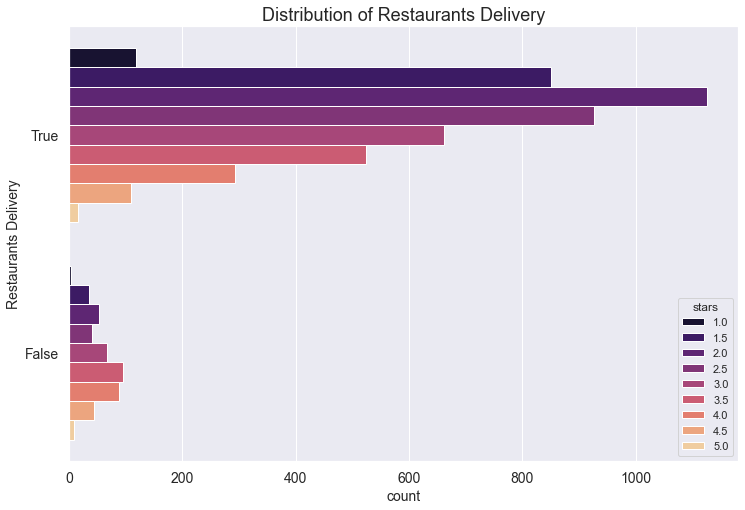

In [100]:
ax = sns.countplot(y='RestaurantsDelivery', hue = 'stars',data=df_attributes, palette = "magma")
ax.legend(loc='lower right')
ax.get_legend().set_title("stars")
plt.title('Distribution of Restaurants Delivery',size = 18)
plt.xlabel("count",size = 14)
plt.xticks(size = 14)
plt.ylabel("Restaurants Delivery",size = 14)
plt.yticks(size = 14)
plt.show()

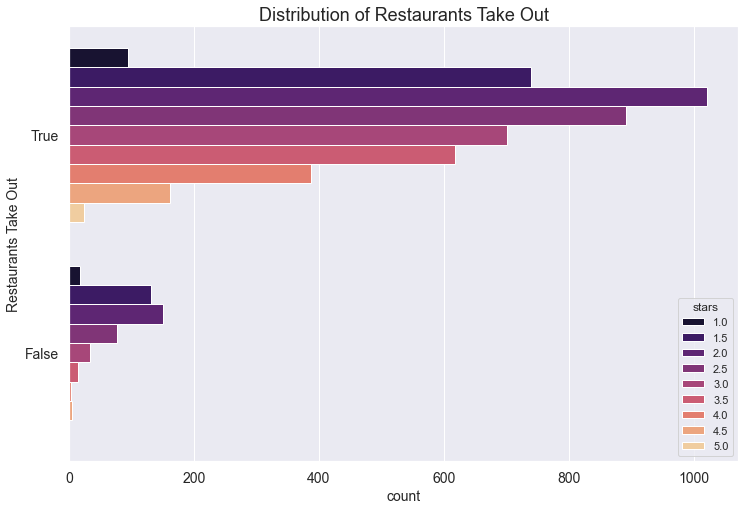

In [101]:
ax = sns.countplot(y='RestaurantsTakeOut', hue = 'stars',data=df_attributes, palette = "magma")
ax.legend(loc='lower right')
ax.get_legend().set_title("stars")
plt.title('Distribution of Restaurants Take Out',size = 18)
plt.xlabel("count",size = 14)
plt.xticks(size = 14)
plt.ylabel("Restaurants Take Out",size = 14)
plt.yticks(size = 14)
plt.show()

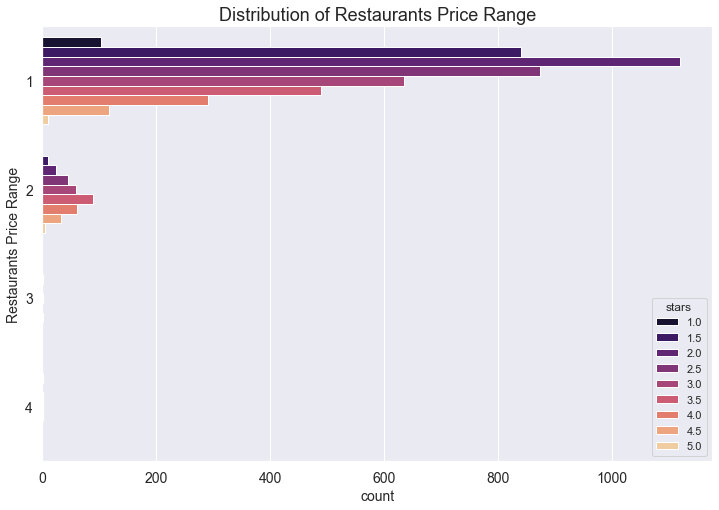

In [102]:
ax = sns.countplot(y='RestaurantsPriceRange2', hue = 'stars',data=df_attributes, palette = "magma")
ax.legend(loc='lower right')
ax.get_legend().set_title("stars")
plt.title('Distribution of Restaurants Price Range',size = 18)
plt.xlabel("count",size = 14)
plt.xticks(size = 14)
plt.ylabel("Restaurants Price Range",size = 14)
plt.yticks(size = 14)
plt.show()

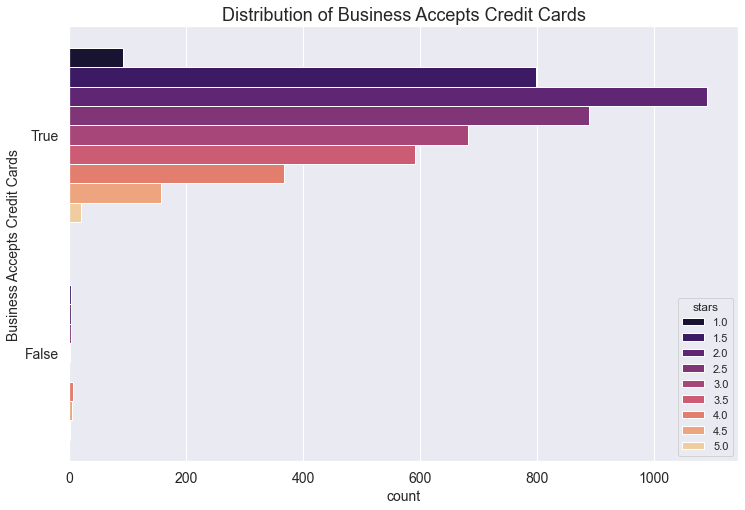

In [103]:
ax = sns.countplot(y='BusinessAcceptsCreditCards', hue = 'stars',data=df_attributes, palette = "magma")
ax.legend(loc='lower right')
ax.get_legend().set_title("stars")
plt.title('Distribution of Business Accepts Credit Cards',size = 18)
plt.xlabel("count",size = 14)
plt.xticks(size = 14)
plt.ylabel("Business Accepts Credit Cards",size = 14)
plt.yticks(size = 14)
plt.show()

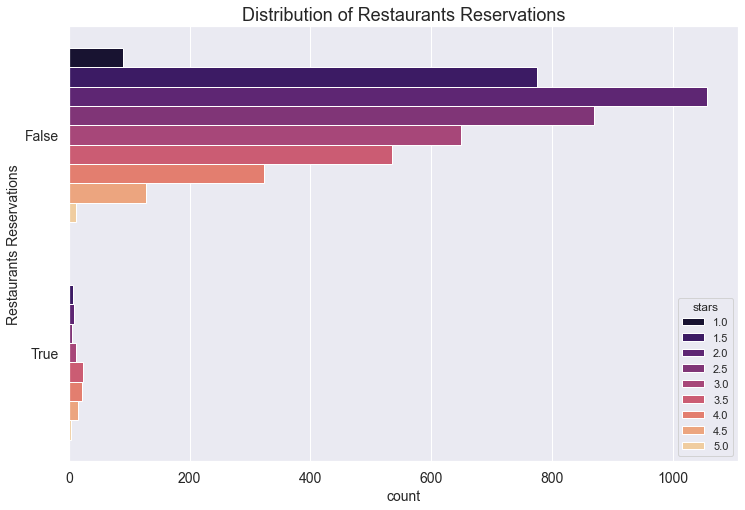

In [104]:
ax = sns.countplot(y='RestaurantsReservations', hue = 'stars',data=df_attributes, palette = "magma")
ax.legend(loc='lower right')
ax.get_legend().set_title("stars")
plt.title('Distribution of Restaurants Reservations',size = 18)
plt.xlabel("count",size = 14)
plt.xticks(size = 14)
plt.ylabel("Restaurants Reservations",size = 14)
plt.yticks(size = 14)
plt.show()

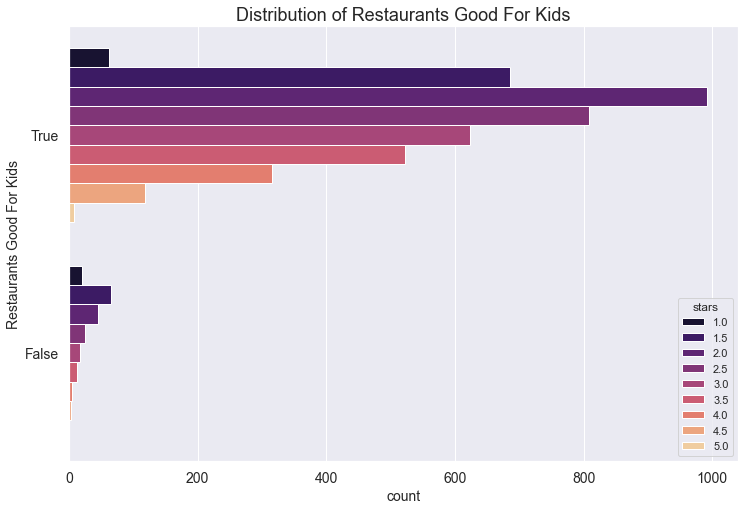

In [109]:
ax = sns.countplot(y='GoodForKids', hue = 'stars',data=df_attributes, palette = "magma")
ax.legend(loc='lower right')
ax.get_legend().set_title("stars")
plt.title('Distribution of Restaurants Good For Kids',size = 18)
plt.xlabel("count",size = 14)
plt.xticks(size = 14)
plt.ylabel("Restaurants Good For Kids",size = 14)
plt.yticks(size = 14)
plt.show()

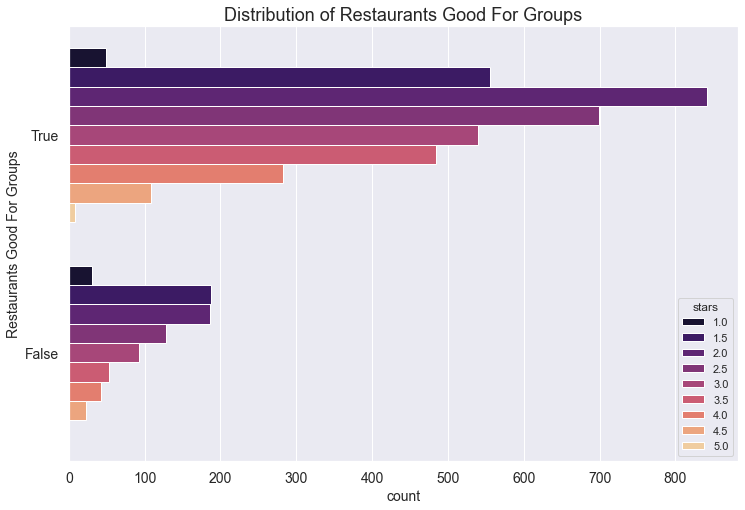

In [105]:
ax = sns.countplot(y='RestaurantsGoodForGroups', hue = 'stars',data=df_attributes, palette = "magma")
ax.legend(loc='lower right')
ax.get_legend().set_title("stars")
plt.title('Distribution of Restaurants Good For Groups',size = 18)
plt.xlabel("count",size = 14)
plt.xticks(size = 14)
plt.ylabel("Restaurants Good For Groups",size = 14)
plt.yticks(size = 14)
plt.show()

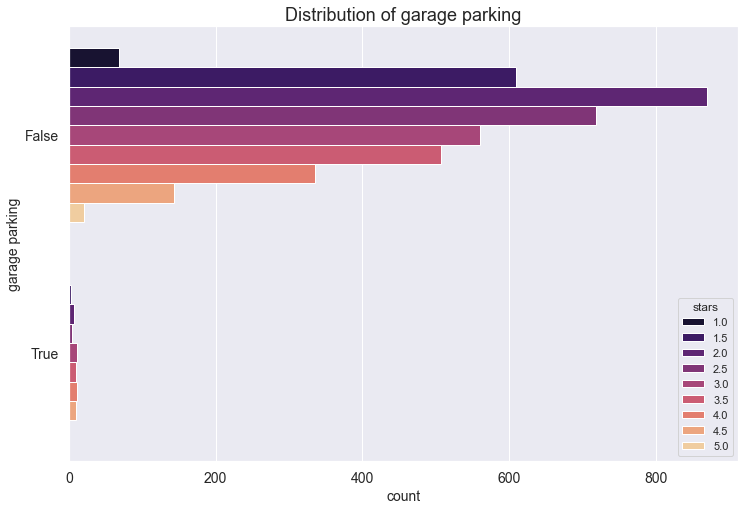

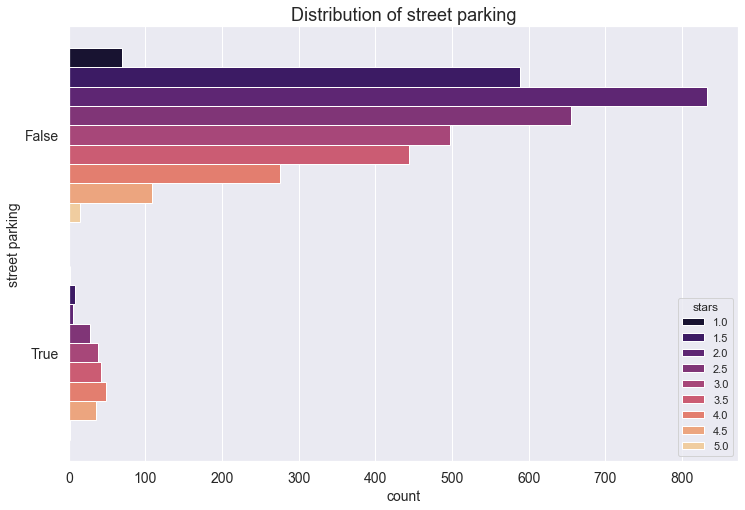

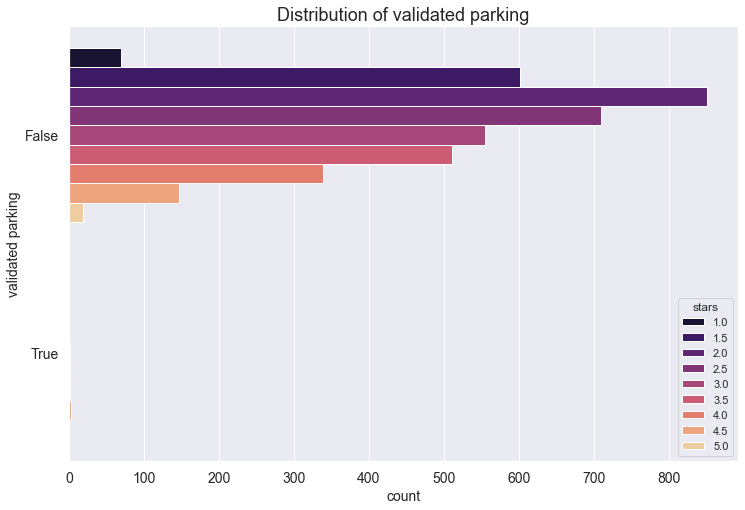

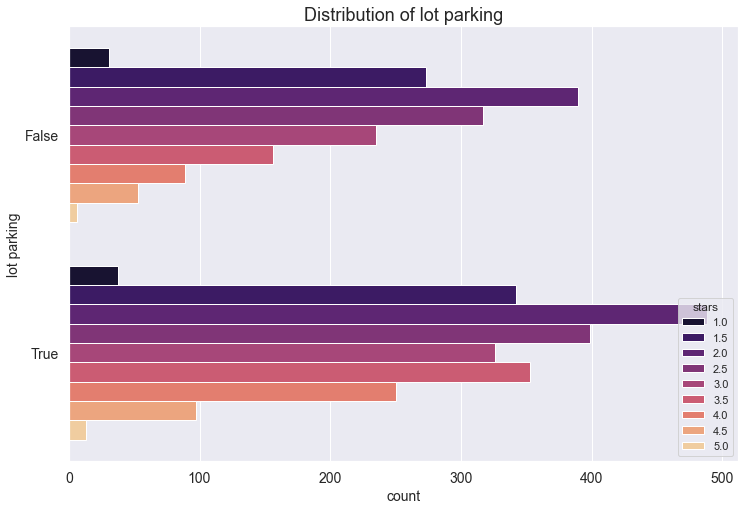

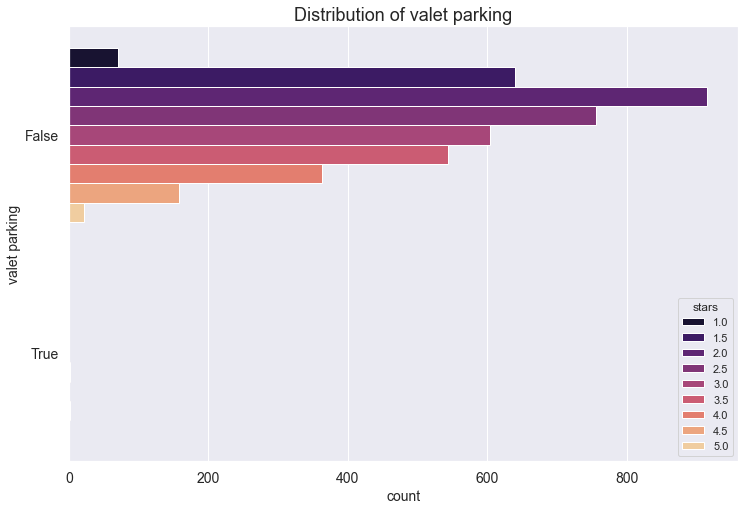

In [131]:
# business parking
for i in ["garage",'street','validated','lot','valet']:
    ax = sns.countplot(y=i, hue = 'stars',data=df_attributes, palette = "magma")
    ax.legend(loc='lower right')
    ax.get_legend().set_title("stars")
    plt.title(f'Distribution of rates for restaurants {i} parking',size = 18)
    plt.xlabel("count",size = 14)
    plt.xticks(size = 14)
    plt.ylabel(f"{i} parking",size = 14)
    plt.yticks(size = 14)
    plt.show()

1. In these attributes, we could see that for most of fast food restaurants, a common feature is that they offer take out or delivery.
2. The price of them are mostly in range 1 or 2, which is an affordable price for most of the customers.
3. For payment, they mostly accept credit cards.
4. Most fast food restaurants do not accept reservations.
5. Most fast food restaurants are good for groups and kids.
6. Most fast food restaurants do not offer garage/street/validated parking; no fast food restaurant has valet parking; lot parking is the most common way of parking for fast food restaurants.